**first trial**

In this trial, I used the Adam optimizer and added L1 regularization with a factor of 0.01 to all layers. I applied batch normalization only to the first layer. The model was trained for 500 epochs with early stopping and ReduceLROnPlateau callbacks to monitor and reduce the learning rate when the validation loss plateaued. The performance was evaluated and plotted against the expected orbit.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files


plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
uploaded = files.upload()

Saving orbit.csv to orbit (3).csv


In [ ]:
fname = "orbit.csv"
data = pd.read_csv(fname)
data.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [ ]:
data.isnull().sum()

,0
time_steps,0
y,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
x = data['time_steps'].to_numpy()
y = data['y'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
model=Sequential()

In [ ]:
from tensorflow.keras.regularizers import l1,l2
model.add(Dense(256,input_shape=(1,),activation='relu',kernel_regularizer=l1(0.01)))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu',kernel_regularizer=l1(0.01)))
model.add(Dense(64,activation='relu',kernel_regularizer=l1(0.01)))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping,reduce_lr])

Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1207.2926 - val_loss: 925.4329 - learning_rate: 0.0010
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 177.1543 - val_loss: 1018.3669 - learning_rate: 0.0010
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 185.7812 - val_loss: 1185.6772 - learning_rate: 0.0010
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 122.5190 - val_loss: 1184.0841 - learning_rate: 0.0010
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 153.9043 - val_loss: 1001.8116 - learning_rate: 0.0010
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 91.4875 - val_loss: 887.7555 - learning_rate: 0.0010
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.5983 - val_loss: 918.5687 - learning_rate: 0.0010
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126.4418 - val_loss: 876.8230 - learning_rate: 0.0010
Epoch 9/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.0992 - val_loss: 711.0269 - l

In [ ]:
model.evaluate(X_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.0061 


25.017675399780273

In [ ]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


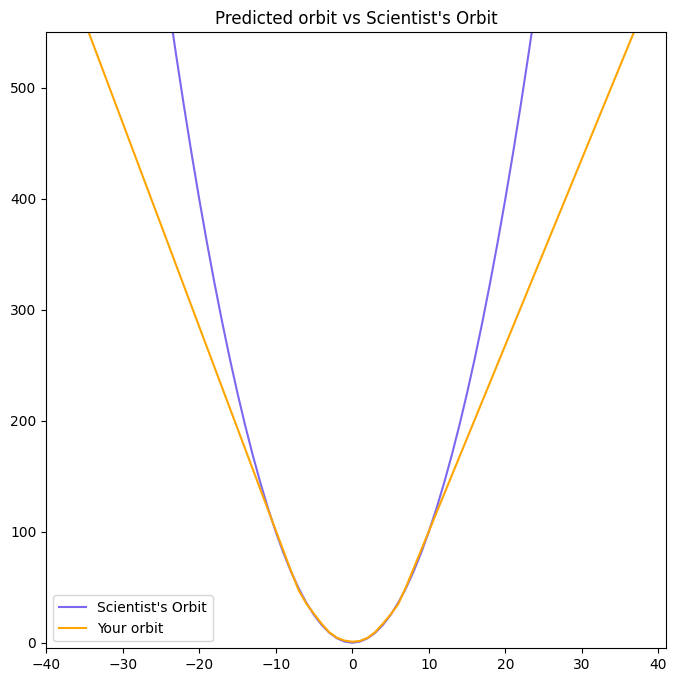

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-50, 51))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

**Fifth trial**

In this trial, I used the Adam optimizer with a learning rate of 0.001 and applied L2 regularization. Batch normalization and dropout (0.2) were applied to both the first and second layers. I added a learning rate scheduler, and early stopping was set with patience of 5 epochs. The model was trained for up to 1000 epochs.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , BatchNormalization ,Dropout
from keras.callbacks import LearningRateScheduler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
data= files.upload()

Saving orbit.csv to orbit (1).csv


In [ ]:
data= pd.read_csv('orbit.csv')
data.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [ ]:
x = data['time_steps'].to_numpy()
y= data['y'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
model=Sequential()

In [ ]:
from tensorflow.keras.layers import Dropout
model.add(Dense(256,input_shape=(1,),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
l_rate=Adam(learning_rate=0.001)
model.compile(optimizer=l_rate,loss='mean_squared_error', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Define the learning rate scheduler function
def lr_schedulaer(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * np.exp(-0.1)
    return lr

# Create the LearningRateScheduler callback
lr_schedule = LearningRateScheduler(lr_schedulaer)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping,lr_schedule])


Epoch 1/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1662.2990 - mae: 30.9427 - val_loss: 1167.3188 - val_mae: 25.6819 - learning_rate: 0.0010
Epoch 2/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 550.5132 - mae: 18.7115 - val_loss: 710.3486 - val_mae: 20.9383 - learning_rate: 0.0010
Epoch 3/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224.3267 - mae: 11.0521 - val_loss: 420.7226 - val_mae: 14.9243 - learning_rate: 0.0010
Epoch 4/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.5398 - mae: 7.5259 - val_loss: 366.5611 - val_mae: 13.4148 - learning_rate: 0.0010
Epoch 5/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.5308 - mae: 7.1874 - val_loss: 396.5038 - val_mae: 14.0857 - learning_rate: 0.0010
Epoch 6/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98.0376 - mae: 6.8744 - val_loss: 376.8968 - val_mae: 13.6970 - learning_rate: 0.0010
Epoch 7/1000
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 137.0815 - mae: 7.5058 - val_loss: 336.0702 - val_mae:

In [ ]:
model.evaluate(X_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.7552 - mae: 3.4158 


[22.422321319580078, 3.460480213165283]

In [ ]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


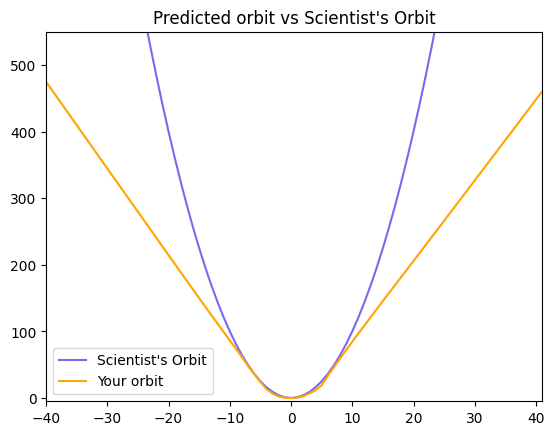

In [ ]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-50, 51))

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

**third trail**

In this trial, I used the RMSprop optimizer with L2 regularization. I applied batch normalization and dropout (0.2) to the first hidden layer only, and used a learning rate scheduler alongside early stopping

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau ,LearningRateScheduler


In [ ]:
# Load data
data = files.upload()
data = pd.read_csv('orbit.csv')

Saving orbit.csv to orbit (2).csv


In [ ]:
x = data['time_steps'].to_numpy()
y = data['y'].to_numpy()

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Define the model
model = Sequential()
# Input layer and first hidden layer with L2 regularizer and dropout
model.add(Dense(256, input_shape=(1,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')


In [ ]:
# Define the learning rate scheduler function
def lr_schedulaer(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * np.exp(-0.1)
    return lr

In [ ]:
# Create the LearningRateScheduler callback
lr_schedule = LearningRateScheduler(lr_schedulaer)


In [ ]:
# Callbacks: Early stopping and reduce learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test),callbacks=[early_stopping, reduce_lr], batch_size=32)


Epoch 1/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1140.4650 - val_loss: 793.4564 - learning_rate: 5.0000e-04
Epoch 2/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 162.5341 - val_loss: 698.1667 - learning_rate: 5.0000e-04
Epoch 3/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 127.0346 - val_loss: 758.7590 - learning_rate: 5.0000e-04
Epoch 4/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 153.2650 - val_loss: 788.3169 - learning_rate: 5.0000e-04
Epoch 5/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 118.7594 - val_loss: 688.9750 - learning_rate: 5.0000e-04
Epoch 6/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 146.9100 - val_loss: 587.7154 - learning_rate: 5.0000e-04
Epoch 7/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.6915 - val_loss: 550.5491 - learning_rate: 5.0000e-04
Epoch 8/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.1055 - val_loss: 528.6795 - learning_rate: 5.0000e-04
Epoch 9/500
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0446 
Test Loss: 6.090597629547119


In [ ]:

# Predict and plot the results
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'], loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.show()



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


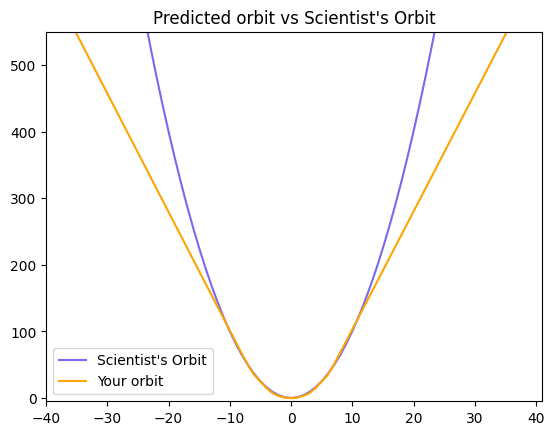

In [ ]:
# Predict the orbit
eighty_min_orbit = model.predict(np.arange(-50, 51).reshape(-1, 1))

# Plot the orbit
plot_orbit(eighty_min_orbit)

**forth trail**

using pytorch

using PyTorch. It involves preprocessing the data, defining a model architecture with multiple layers and dropout for regularization, training the model using the Adam optimizer and MSE loss, and evaluating the predictions by plotting them against a reference orbit.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv('orbit.csv')
x = data['time_steps'].to_numpy().reshape(-1, 1)
y = data['y'].to_numpy().reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Create a DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
# Define the neural network model with ReLU using nn.Sequential
model = nn.Sequential(
    nn.Linear(1, 256),        # Input layer
    nn.BatchNorm1d(256),      # Batch normalization
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(256, 128),      # Second layer
    nn.ReLU(),
    # nn.Dropout(0.1),
    nn.Linear(128, 64),       # Third layer
    nn.ReLU(),
    # nn.Dropout(0.1),
    nn.Linear(64, 1)          # Output layer
)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=0.5)

# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Step the scheduler
    scheduler.step(loss)

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [50/500], Loss: 261.3124
Epoch [100/500], Loss: 177.2417
Epoch [150/500], Loss: 120.1900
Epoch [200/500], Loss: 116.8307
Epoch [250/500], Loss: 264.3703
Epoch [300/500], Loss: 172.7514
Epoch [350/500], Loss: 133.3984
Epoch [400/500], Loss: 186.9665
Epoch [450/500], Loss: 276.0481
Epoch [500/500], Loss: 110.2265


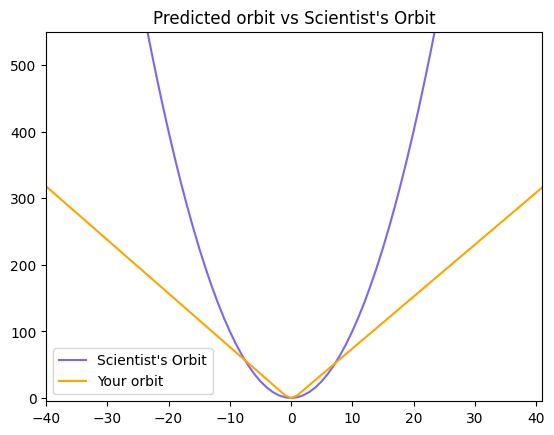

In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Plot the results
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2, color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'], loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.show()

# Predict the orbit
eighty_min_orbit = model(torch.FloatTensor(np.arange(-50, 51).reshape(-1, 1)))

# Plot the orbit
plot_orbit(eighty_min_orbit.detach().numpy())  # Use detach() here


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the data
data = pd.read_csv('orbit.csv')
x = data['time_steps'].to_numpy().reshape(-1, 1)  # Reshape for single feature
y = data['y'].to_numpy().reshape(-1, 1)  # Reshape for single output

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Create a DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:

# Define the neural network model with ReLU
class OrbitModel(nn.Module):
    def __init__(self):
        super(OrbitModel, self).__init__()
        self.fc1 = nn.Linear(1, 256)  # Input layer
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)  # Second layer
        self.fc3 = nn.Linear(128, 64)  # Third layer
        self.fc4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))  # Pass through first layer
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))  # Pass through third layer
        x = self.dropout(x)
        x = self.fc4(x)  # Output layer
        return x

In [ ]:

# Instantiate the model
model = OrbitModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(batch_X)  # Forward pass
        loss = criterion(outputs, batch_y)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    # Step the scheduler
    scheduler.step(loss)

    # Optionally print the loss every 50 epochs
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 34.4173
Epoch [100/1000], Loss: 115.1301
Epoch [150/1000], Loss: 41.6045
Epoch [200/1000], Loss: 48.2372
Epoch [250/1000], Loss: 222.2260
Epoch [300/1000], Loss: 115.3344
Epoch [350/1000], Loss: 144.3530
Epoch [400/1000], Loss: 760.0305
Epoch [450/1000], Loss: 62.7923
Epoch [500/1000], Loss: 24.2694
Epoch [550/1000], Loss: 43.3532
Epoch [600/1000], Loss: 81.3436
Epoch [650/1000], Loss: 59.2384
Epoch [700/1000], Loss: 475.8667
Epoch [750/1000], Loss: 128.3698
Epoch [800/1000], Loss: 237.9524
Epoch [850/1000], Loss: 71.1680
Epoch [900/1000], Loss: 482.3716
Epoch [950/1000], Loss: 67.9542
Epoch [1000/1000], Loss: 300.7774


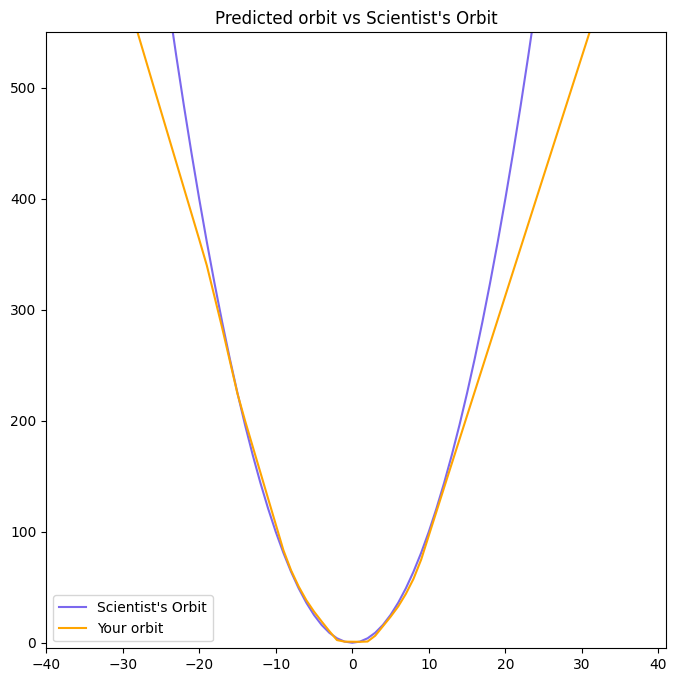

In [ ]:


# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

# Plot the results
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1), np.arange(-axeslim, axeslim + 1) ** 2, color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1), model_preds, color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'], loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.show()

# Predict the orbit
eighty_min_orbit = model(torch.FloatTensor(np.arange(-50, 51).reshape(-1, 1)))

# Plot the orbit
plot_orbit(eighty_min_orbit.detach().numpy())  # Use detach() here
